In [1]:
# import the needed libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import KFold, train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

In [2]:
# read the data
# https://www.kaggle.com/datasets/nelgiriyewithana/credit-card-fraud-detection-dataset-2023
df = pd.read_csv("creditcard_2023.csv")
df.shape

(568630, 31)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   id      568630 non-null  int64  
 1   V1      568630 non-null  float64
 2   V2      568630 non-null  float64
 3   V3      568630 non-null  float64
 4   V4      568630 non-null  float64
 5   V5      568630 non-null  float64
 6   V6      568630 non-null  float64
 7   V7      568630 non-null  float64
 8   V8      568630 non-null  float64
 9   V9      568630 non-null  float64
 10  V10     568630 non-null  float64
 11  V11     568630 non-null  float64
 12  V12     568630 non-null  float64
 13  V13     568630 non-null  float64
 14  V14     568630 non-null  float64
 15  V15     568630 non-null  float64
 16  V16     568630 non-null  float64
 17  V17     568630 non-null  float64
 18  V18     568630 non-null  float64
 19  V19     568630 non-null  float64
 20  V20     568630 non-null  float64
 21  V21     56

In [4]:
# drop the unneeded columns
pd.options.display.max_columns = df.shape[1]
df.drop('id',axis = 1 , inplace = True)
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,0.637735,-0.987020,0.293438,-0.941386,0.549020,1.804879,0.215598,0.512307,0.333644,0.124270,0.091202,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,0.529808,0.140107,1.564246,0.574074,0.627719,0.706121,0.789188,0.403810,0.201799,-0.340687,-0.233984,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,0.690708,-0.272985,0.659201,0.805173,0.616874,3.069025,-0.577514,0.886526,0.239442,-2.366079,0.361652,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,0.575231,-0.752581,0.737483,0.592994,0.559535,-0.697664,-0.030669,0.242629,2.178616,-1.345060,-0.378223,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,0.968046,-1.203171,1.029577,1.439310,0.241454,0.153008,0.224538,0.366466,0.291782,0.445317,0.247237,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0


In [5]:
# data statistics
df.describe(include='all')

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,5.686300e+05,568630.000000,568630.0
mean,-5.638058e-17,-1.319545e-16,-3.518788e-17,-2.879008e-17,7.997245e-18,-3.958636e-17,-3.198898e-17,2.109273e-17,3.998623e-17,1.991314e-16,-1.183592e-16,-5.758017e-17,-5.698037e-18,-4.078595e-17,2.649087e-17,-1.719408e-17,-3.398829e-17,-5.837989e-17,2.479146e-17,-1.579456e-17,4.758361e-17,3.948640e-18,6.194741e-18,-2.799036e-18,-3.178905e-17,-7.497417e-18,-3.598760e-17,2.609101e-17,12041.957635,0.5
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,6919.644449,0.5
min,-3.495584e+00,-4.996657e+01,-3.183760e+00,-4.951222e+00,-9.952786e+00,-2.111111e+01,-4.351839e+00,-1.075634e+01,-3.751919e+00,-3.163276e+00,-5.954723e+00,-2.020399e+00,-5.955227e+00,-2.107417e+00,-3.861813e+00,-2.214513e+00,-2.484938e+00,-2.421949e+00,-7.804988e+00,-7.814784e+01,-1.938252e+01,-7.734798e+00,-3.029545e+01,-4.067968e+00,-1.361263e+01,-8.226969e+00,-1.049863e+01,-3.903524e+01,50.010000,0.0
25%,-5.652859e-01,-4.866777e-01,-6.492987e-01,-6.560203e-01,-2.934955e-01,-4.458712e-01,-2.835329e-01,-1.922572e-01,-5.687446e-01,-5.901008e-01,-7.014495e-01,-8.311331e-01,-6.966667e-01,-8.732057e-01,-6.212485e-01,-7.162655e-01,-6.194913e-01,-5.560458e-01,-5.653082e-01,-3.502399e-01,-1.664408e-01,-4.904892e-01,-2.376289e-01,-6.515801e-01,-5.541485e-01,-6.318948e-01,-3.049607e-01,-2.318783e-01,6054.892500,0.0
50%,-9.363846e-02,-1.358939e-01,3.528579e-04,-7.376152e-02,8.108788e-02,7.871758e-02,2.333659e-01,-1.145242e-01,9.252647e-02,2.626145e-01,-4.104986e-02,1.620521e-01,1.760812e-02,2.305011e-01,-3.925566e-02,1.340262e-01,2.716407e-01,8.729382e-02,-2.597869e-02,-1.233776e-01,-3.743065e-02,-2.732881e-02,-5.968903e-02,1.590123e-02,-8.193162e-03,-1.189208e-02,-1.729111e-01,-1.392973e-02,12030.150000,0.5
75%,8.326582e-01,3.435552e-01,6.285380e-01,7.070047e-01,4.397368e-01,4.977881e-01,5.259548e-01,4.729905e-02,5.592621e-01,5.924603e-01,7.477730e-01,7.446723e-01,6.856048e-01,7.518216e-01,6.654065e-01,6.556061e-01,5.182242e-01,5.443887e-01,5.601164e-01,2.482164e-01,1.479787e-01,4.638817e-01,1.557153e-01,7.007374e-01,5.500147e-01,6.728879e-01,3.340230e-01,4.095903e-01,18036.330000,1.0
max,2.229046e+00,4.361865e+00,1.412583e+01,3.201536e+00,4.271689e+01,2.616840e+01,2.178730e+02,5.958040e+00,2.027006e+01,3.172271e+01,2.513573e+00,1.791356e+01,7.187486e+00,1.916954e+01,1.453220e+01,4.665291e+01,6.994124e+00,6.783716e+00,3.831672e+00,2.987281e+01,8.087080e+00,1.263251e+01,3.170763e+01,1.296564e+01,1.462151e+01,5.623285e+00,1.132311e+02,7.725594e+01,24039.930000,1.0


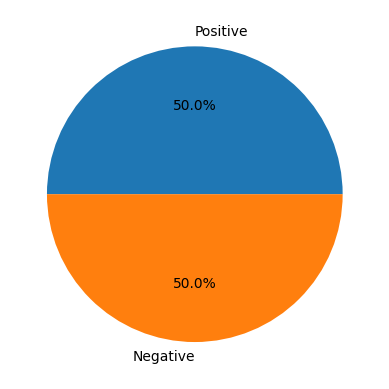

[284315, 284315]

In [6]:
# percentage of each class
labels = ["Positive","Negative"]
values = [(df['Class'] == 1).sum(), (df['Class'] == 0).sum()]
plt.pie(x=values, labels=labels ,autopct='%.1f%%')
plt.show()
values

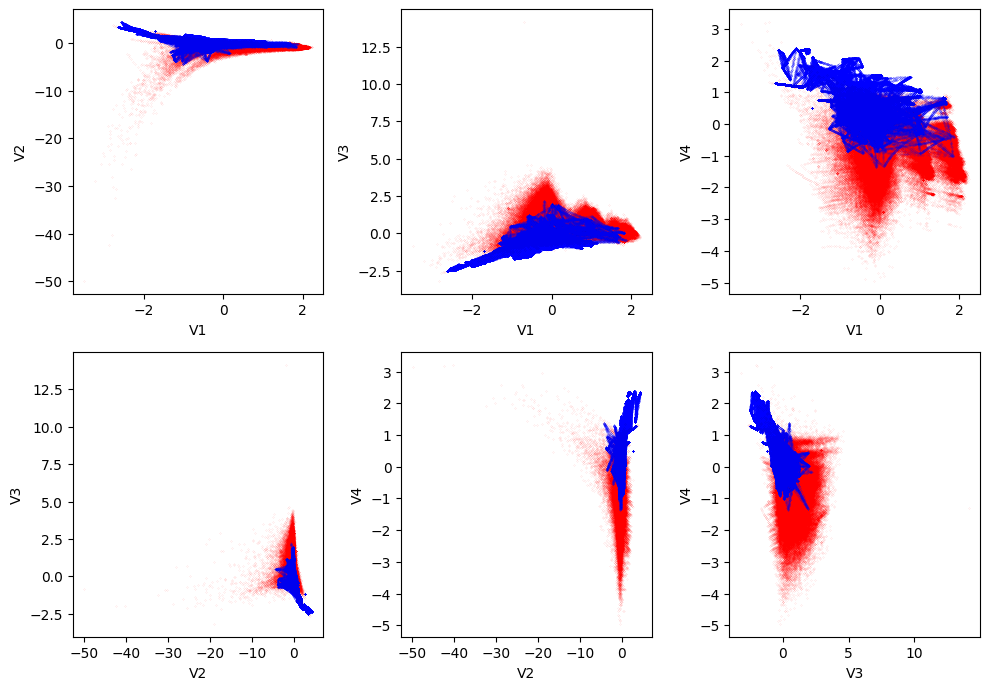

In [7]:
# relation between some features
features = ['V1', 'V2', 'V3', 'V4']
plt.figure(figsize=(10, 10))
combinations = list(itertools.combinations(features, 2))

for i, (feature1, feature2) in enumerate(combinations):
    plt.subplot(len(features)-1 , len(features)-1, i + 1)
    
    
    plt.scatter(df[df['Class'] == 0][feature1], df[df['Class'] == 0][feature2], color='red', label='Class 0', alpha=0.4, s=0.01)
    plt.scatter(df[df['Class'] == 1][feature1], df[df['Class'] == 1][feature2], color='blue', label='Class 1', alpha=0.4, s=0.01)
   
    plt.xlabel(feature1)
    plt.ylabel(feature2)

plt.tight_layout()    
plt.show()

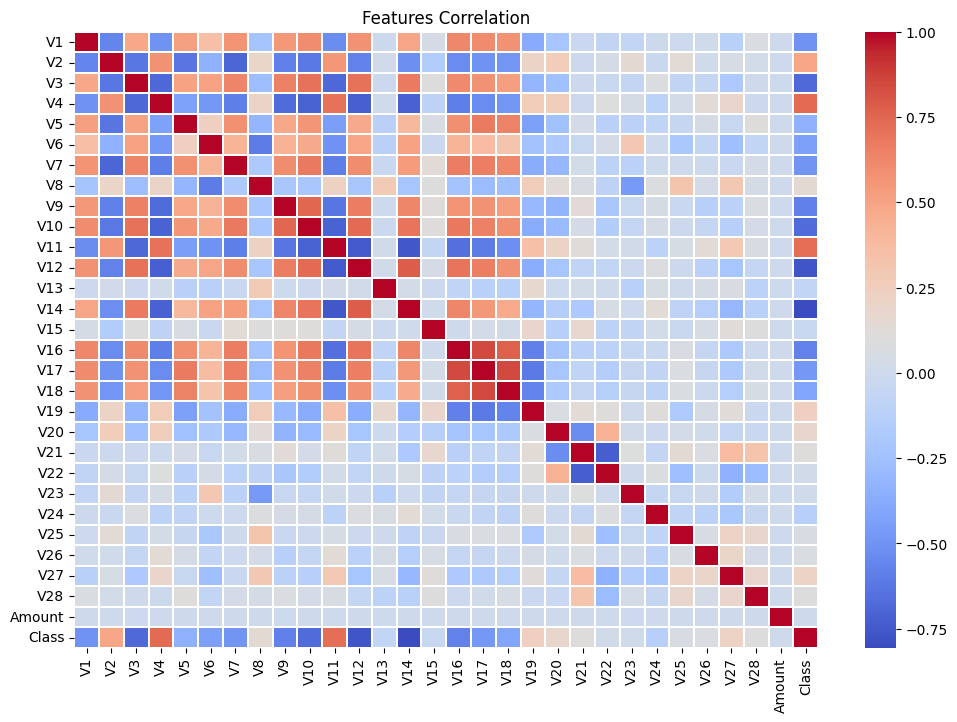

In [8]:
# correlation between each feature
correlation_matrix = df.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', linewidths=0.3)
plt.title('Features Correlation')
plt.show()

In [9]:
# split into x and y
X = df.drop('Class', axis=1)
y = df['Class']

In [10]:
# split to train and test
X_tr, X_ts, y_tr, y_ts = train_test_split( X, y, test_size=0.2, random_state=42, shuffle=True)

In [11]:
# Initialize the Logistic Regression model and KFold cross-validation
kf = KFold(n_splits=3, shuffle=True, random_state=22)
model = LogisticRegression(max_iter=500)

Fold 1 - Accuracy: 0.9585


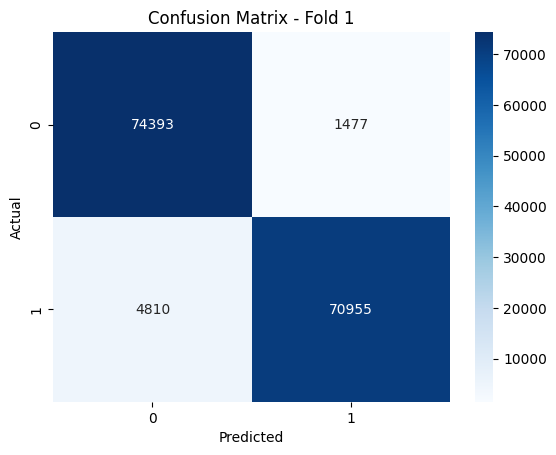

Fold 2 - Accuracy: 0.9596


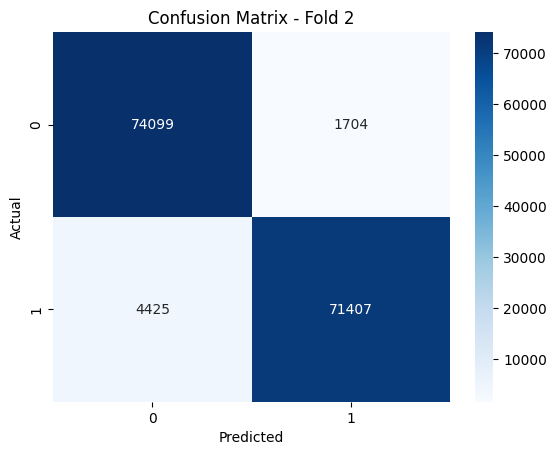

Fold 3 - Accuracy: 0.9603


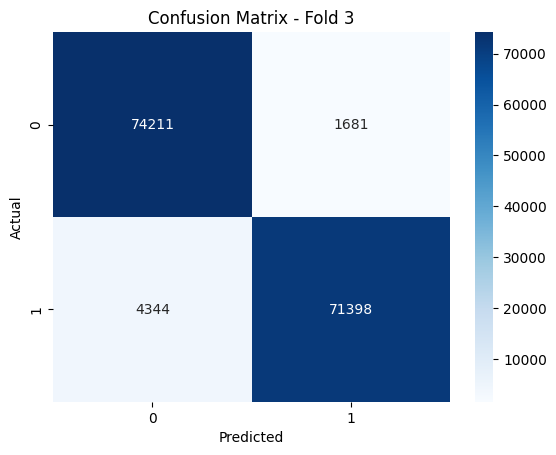


Average Accuracy: 0.9595


In [12]:
accuracies = []
confusion_matrices = []

# Iterate through each fold
fold = 1
for train_index, val_index in kf.split(X_tr):
    X_train, X_val = X_tr.iloc[train_index], X_tr.iloc[val_index]
    y_train, y_val = y_tr.iloc[train_index], y_tr.iloc[val_index]
    
    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict the validation set
    y_pred = model.predict(X_val)
    
    # Compute the accuracy and confusion matrix
    accuracy = accuracy_score(y_val, y_pred)
    cm = confusion_matrix(y_val, y_pred)

    accuracies.append(accuracy)
    confusion_matrices.append(cm)
    
    print(f"Fold {fold} - Accuracy: {accuracy:.4f}")
    
    # Plot the confusion matrix
    plt.figure()
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()
    
    fold += 1

average_accuracy = np.mean(accuracies)
print(f"\nAverage Accuracy: {average_accuracy:.4f}")

0.9601410407470587


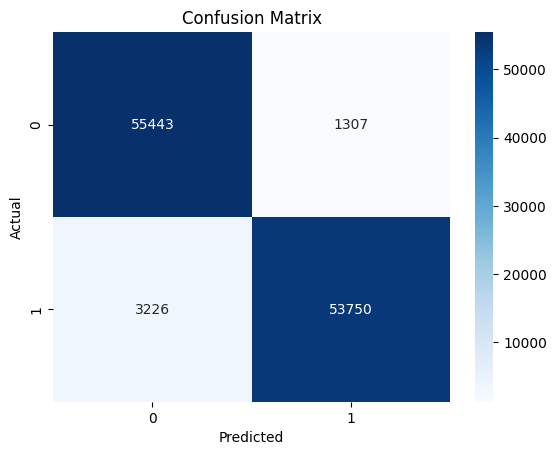

In [13]:
# test on new unseen data
y_pre = model.predict(X_ts)
ac = accuracy_score(y_ts,y_pre)
print(ac)
cm_test = confusion_matrix(y_ts,y_pre)
plt.figure()
sns.heatmap(cm_test, annot=True, fmt='d', cmap='Blues')
plt.title(f"Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()